In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure



In [9]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None



In [69]:
df = pd.read_csv("movies.csv") 

In [71]:
with open("movies.csv", 'r') as f:
    print(f.readline())


name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime



In [73]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [75]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [88]:
df = df.dropna(subset=['gross'])
df['budget'] = df['budget'].fillna(df['budget'].median())
df['rating'] = df['rating'].fillna('Not Rated')

In [90]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [92]:
df['budget']= df['budget'].astype('int64')

df['gross']= df['gross'].astype('int64')


In [193]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,519,5,0,2009,683,7.8,1100000.0,1116,1719,2233,53,237000000,2847246203,2148,162.0,9
7445,521,5,0,2019,179,8.4,903000.0,161,717,2141,53,356000000,2797501328,1532,181.0,7
3045,6727,5,6,1997,691,7.8,1100000.0,1116,1719,1524,53,200000000,2201647264,2148,194.0,9
6663,5008,5,0,2015,685,7.8,876000.0,1086,2468,504,53,245000000,2069521700,1470,138.0,9
7244,522,5,0,2018,188,8.4,897000.0,161,717,2141,53,321000000,2048359754,1532,149.0,7


In [195]:
df['month']= df['released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,519,5,0,2009,683,7.8,1100000.0,1116,1719,2233,53,237000000,2847246203,2148,162.0,683
7445,521,5,0,2019,179,8.4,903000.0,161,717,2141,53,356000000,2797501328,1532,181.0,179
3045,6727,5,6,1997,691,7.8,1100000.0,1116,1719,1524,53,200000000,2201647264,2148,194.0,691
6663,5008,5,0,2015,685,7.8,876000.0,1086,2468,504,53,245000000,2069521700,1470,138.0,685
7244,522,5,0,2018,188,8.4,897000.0,161,717,2141,53,321000000,2048359754,1532,149.0,188


In [113]:
df.drop('yearcorrect', axis=1, inplace=True)

In [121]:
df= df.sort_values(by=['gross'], inplace=False, ascending=False)

In [117]:
pd.set_option('display.max_row', None)

In [197]:
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,519,5,0,2009,683,7.8,1100000.0,1116,1719,2233,53,237000000,2847246203,2148,162.0,683
7445,521,5,0,2019,179,8.4,903000.0,161,717,2141,53,356000000,2797501328,1532,181.0,179
3045,6727,5,6,1997,691,7.8,1100000.0,1116,1719,1524,53,200000000,2201647264,2148,194.0,691
6663,5008,5,0,2015,685,7.8,876000.0,1086,2468,504,53,245000000,2069521700,1470,138.0,685
7244,522,5,0,2018,188,8.4,897000.0,161,717,2141,53,321000000,2048359754,1532,149.0,188


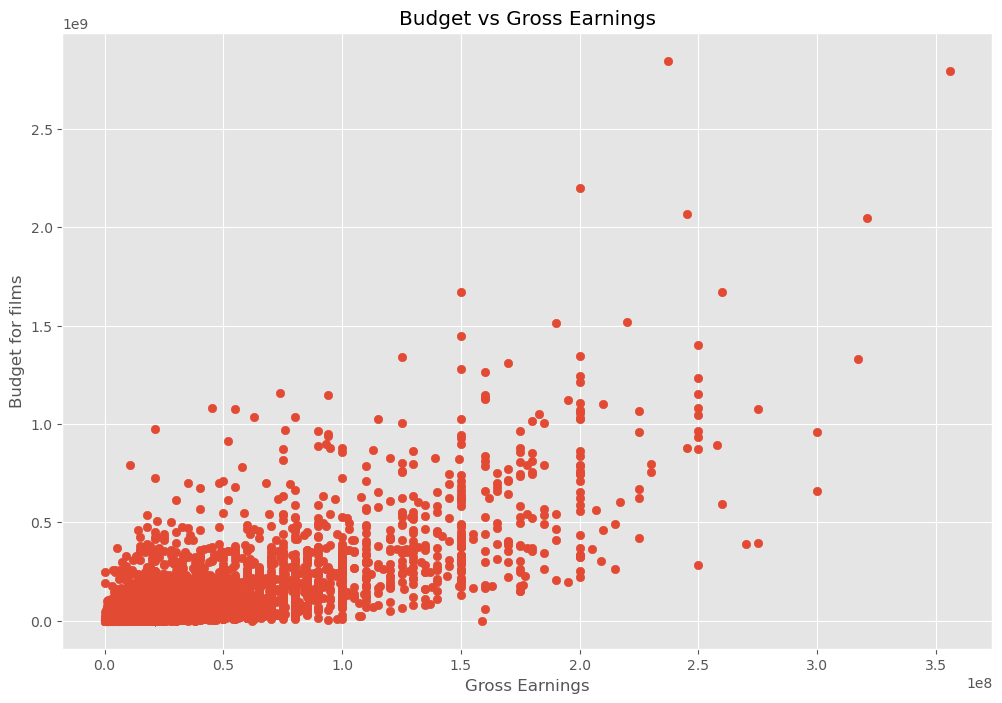

In [141]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for films')
plt.show()

In [133]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


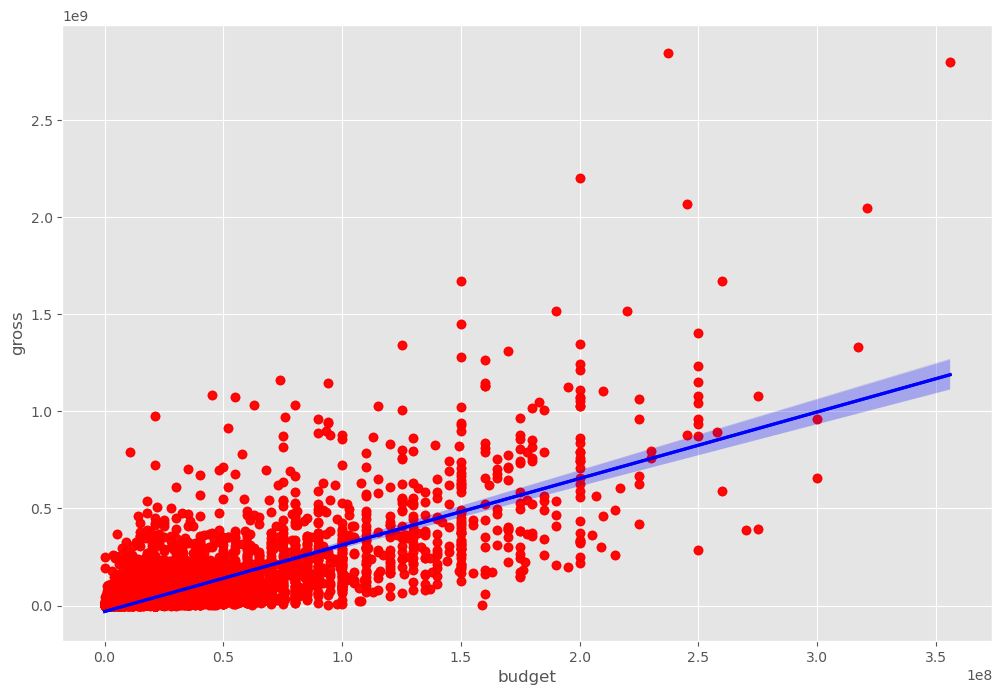

In [151]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.show()

In [158]:
df.corr(method ='pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.091821,0.215740,0.288977,0.257486,0.114706
score,0.091821,1.000000,0.413096,0.058253,0.186258,0.397321
votes,0.215740,0.413096,1.000000,0.457389,0.630757,0.309536
budget,0.288977,0.058253,0.457389,1.000000,0.744926,0.272891
gross,0.257486,0.186258,0.630757,0.744926,1.000000,0.245216
runtime,0.114706,0.397321,0.309536,0.272891,0.245216,1.000000


In [160]:
df.corr(method ='kendall', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.063569,0.319743,0.184561,0.200618,0.091032
score,0.063569,1.000000,0.301718,-0.006379,0.086046,0.282310
votes,0.319743,0.301718,1.000000,0.268583,0.548899,0.190631
budget,0.184561,-0.006379,0.268583,1.000000,0.379825,0.191050
gross,0.200618,0.086046,0.548899,0.379825,1.000000,0.168933
runtime,0.091032,0.282310,0.190631,0.191050,0.168933,1.000000


In [162]:
df.corr(method ='spearman', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.093274,0.454881,0.257353,0.293084,0.134219
score,0.093274,1.000000,0.430797,-0.009499,0.126116,0.398195
votes,0.454881,0.430797,1.000000,0.381750,0.742050,0.279828
budget,0.257353,-0.009499,0.381750,1.000000,0.525322,0.269309
gross,0.293084,0.126116,0.742050,0.525322,1.000000,0.246243
runtime,0.134219,0.398195,0.279828,0.269309,0.246243,1.000000


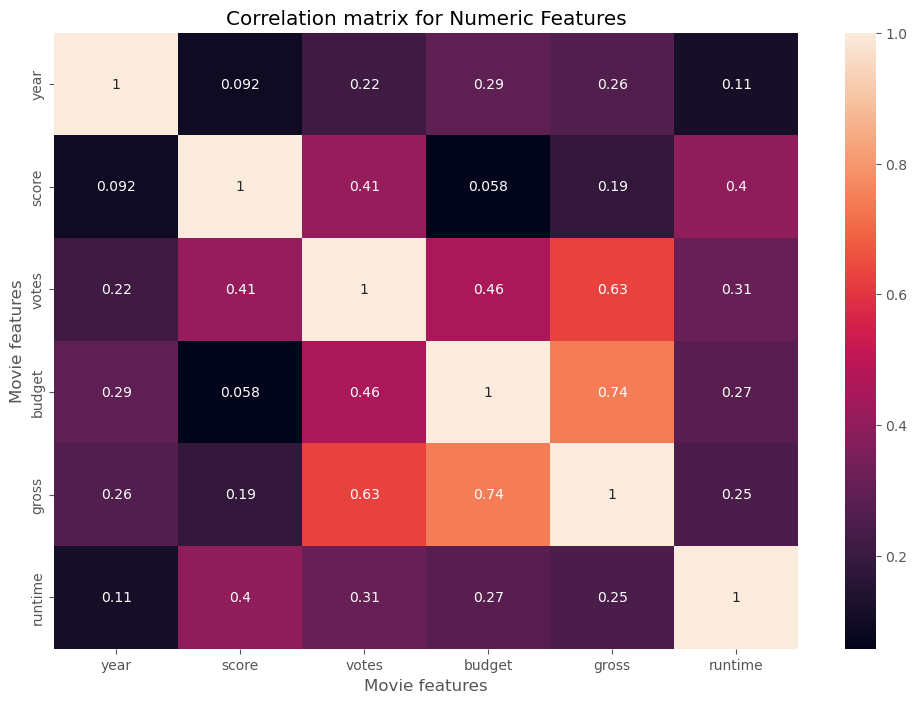

In [171]:
correlation_matrix = df.corr(method='pearson',numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [173]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


In [199]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
5445,519,5,0,2009,683,7.8,1100000.0,1116,1719,2233,53,237000000,2847246203,2148,162.0,2971
7445,521,5,0,2019,179,8.4,903000.0,161,717,2141,53,356000000,2797501328,1532,181.0,879
3045,6727,5,6,1997,691,7.8,1100000.0,1116,1719,1524,53,200000000,2201647264,2148,194.0,2980
6663,5008,5,0,2015,685,7.8,876000.0,1086,2468,504,53,245000000,2069521700,1470,138.0,2973
7244,522,5,0,2018,188,8.4,897000.0,161,717,2141,53,321000000,2048359754,1532,149.0,979


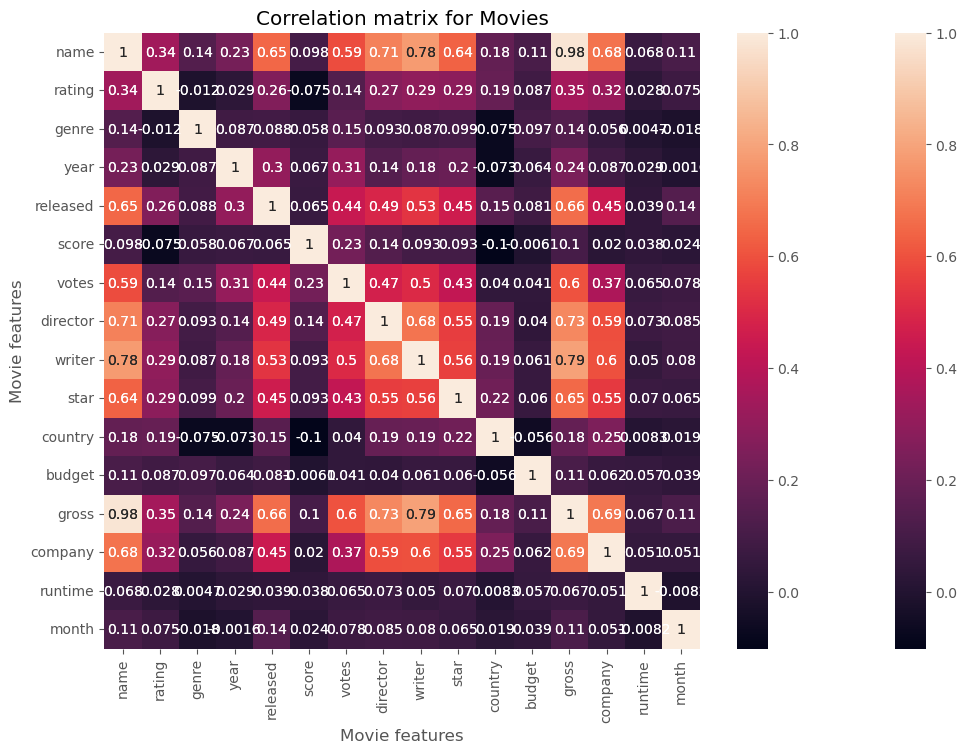

In [183]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")
plt.show()


In [185]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
name,1.000000,-0.009492,0.017885,0.007404,-0.011033,0.015473,0.011429,0.009092,0.008008,0.007278,-0.012027,0.020096,0.005557,0.008155,0.009142,-0.012506
rating,-0.009492,1.000000,0.108952,0.021760,0.023280,0.012826,0.020749,0.014168,-0.005345,0.003456,0.044809,-0.141535,-0.124897,-0.074149,0.067862,0.020344
genre,0.017885,0.108952,1.000000,-0.082252,0.026804,0.046093,-0.149289,-0.016412,0.008231,-0.002322,-0.033283,-0.337453,-0.243059,-0.074570,-0.041023,0.024940
year,0.007404,0.021760,-0.082252,1.000000,0.002465,0.091821,0.215740,-0.019116,-0.008780,-0.032319,-0.084488,0.288977,0.257486,-0.014883,0.114706,0.000252
released,-0.011033,0.023280,0.026804,0.002465,1.000000,0.044301,0.018043,-0.002315,-0.002699,0.015812,-0.020083,0.014178,0.002341,-0.007031,0.000605,0.995717
score,0.015473,0.012826,0.046093,0.091821,0.044301,1.000000,0.413096,0.008810,0.018648,0.000310,-0.129474,0.058253,0.186258,-0.001107,0.397321,0.042872
votes,0.011429,0.020749,-0.149289,0.215740,0.018043,0.413096,1.000000,0.000919,0.000972,-0.021274,0.069934,0.457389,0.630757,0.131020,0.309536,0.018509
director,0.009092,0.014168,-0.016412,-0.019116,-0.002315,0.008810,0.000919,1.000000,0.297601,0.036794,0.014435,-0.002036,-0.014490,0.004213,0.016942,-0.001488
writer,0.008008,-0.005345,0.008231,-0.008780,-0.002699,0.018648,0.000972,0.297601,1.000000,0.023374,0.011871,-0.030792,-0.023574,0.005972,-0.002816,-0.003428
star,0.007278,0.003456,-0.002322,-0.032319,0.015812,0.000310,-0.021274,0.036794,0.023374,1.000000,-0.016192,-0.020100,-0.002602,0.007518,0.009227,0.015074


In [187]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.340195
          genre       0.138256
          year        0.227433
          released    0.649544
          score       0.098301
          votes       0.587142
          director    0.709672
          writer      0.775332
          star        0.637025
          country     0.181828
          budget      0.111371
          gross       0.979595
          company     0.675083
          runtime     0.067538
          month       0.112930
rating    name        0.340195
          rating      1.000000
          genre      -0.012187
          year        0.029424
          released    0.257338
          score      -0.074636
          votes       0.138907
          director    0.271257
          writer      0.294258
          star        0.287112
          country     0.188836
          budget      0.087368
          gross       0.345734
          company     0.319225
          runtime     0.027831
          month       0.075266
genre   

In [189]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country   score      -0.101932
score     country    -0.101932
country   genre      -0.075274
genre     country    -0.075274
score     rating     -0.074636
rating    score      -0.074636
year      country    -0.072704
country   year       -0.072704
          budget     -0.055893
budget    country    -0.055893
genre     month      -0.017529
month     genre      -0.017529
genre     rating     -0.012187
rating    genre      -0.012187
month     runtime    -0.008175
runtime   month      -0.008175
budget    score      -0.006096
score     budget     -0.006096
month     year       -0.001633
year      month      -0.001633
genre     runtime     0.004718
runtime   genre       0.004718
          country     0.008348
country   runtime     0.008348
          month       0.018613
month     country     0.018613
company   score       0.019773
score     company     0.019773
          month       0.023998
month     score       0.023998
rating    runtime     0.027831
runtime   rating      0.027831
        

In [191]:
high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]

print(high_corr)

votes     writer      0.504422
writer    votes       0.504422
released  writer      0.533922
writer    released    0.533922
company   star        0.547320
star      company     0.547320
          director    0.554864
director  star        0.554864
writer    star        0.564363
star      writer      0.564363
votes     name        0.587142
name      votes       0.587142
director  company     0.594343
company   director    0.594343
writer    company     0.597453
company   writer      0.597453
votes     gross       0.601605
gross     votes       0.601605
name      star        0.637025
star      name        0.637025
released  name        0.649544
name      released    0.649544
gross     star        0.652123
star      gross       0.652123
released  gross       0.661993
gross     released    0.661993
name      company     0.675083
company   name        0.675083
director  writer      0.680339
writer    director    0.680339
company   gross       0.687236
gross     company     0.687236
name    